EMPLOYEE SALARY PREDICTION USING XGBOOST

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/adult 3.csv')
print(data.shape)
data

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [31]:
print(data)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [32]:
print(data.age.value_counts())
print("------------------------------------------")
print(data.workclass.value_counts())
print("------------------------------------------")
print(data.fnlwgt.value_counts())
print("------------------------------------------")
print(data.education.value_counts())
print("------------------------------------------")
print(data['educational-num'].value_counts())
print("------------------------------------------")
print(data.occupation.value_counts())
print("------------------------------------------")
print(data['marital-status'].value_counts())
print("------------------------------------------")
print(data.relationship.value_counts())
print("------------------------------------------")
print(data.race.value_counts())
print("------------------------------------------")
print(data.gender.value_counts())
print("------------------------------------------")
print(data['capital-gain'].value_counts())
print("------------------------------------------")
print(data['capital-loss'].value_counts())
print("------------------------------------------")
print(data['hours-per-week'].value_counts())
print("------------------------------------------")
print(data['native-country'].value_counts())
print("------------------------------------------")
print(data.income.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
------------------------------------------
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
------------------------------------------
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64
------------------------------------------
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th              

In [33]:
#Removing irrelevant values
data = data[data['education']!='Preschool']
data = data[data['education']!='5th-6th']
data = data[data['education']!='1st-4th']
print(data['education'].value_counts())
print("---------------------------------------")

data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())
print("---------------------------------------")

data = data[data['occupation']!='Armed-Forces']
print(data['occupation'].value_counts())
print("---------------------------------------")

data = data[data['native-country']!='Holand-Netherlands']
print(data['native-country'].value_counts())
print("---------------------------------------")

data = data[(data['age']>=17) & (data['age']<=75)]
print(data['age'].value_counts())
print("---------------------------------------")

value = data['hours-per-week'].value_counts()
hour = value[value>10].index
data = data[data['hours-per-week'].isin(hour)]
print(data['hours-per-week'].value_counts())
print("---------------------------------------")

data['capital-gain'] = np.log1p(data['capital-gain'])
data['capital-loss'] = np.log1p(data['capital-loss'])

cap_gain = data['capital-gain'].value_counts()
cap_gain = cap_gain[cap_gain>25].index
data = data[data['capital-gain'].isin(cap_gain)]
print(data['capital-gain'].value_counts())
print("---------------------------------------")

cap_loss = data['capital-loss'].value_counts()
cap_loss = cap_loss[cap_loss>25].index
data = data[data['capital-loss'].isin(cap_loss)]
print(data['capital-loss'].value_counts())

data.shape

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64
---------------------------------------
workclass
Private             33231
Self-emp-not-inc     3808
Local-gov            3114
?                    2730
State-gov            1974
Self-emp-inc         1685
Federal-gov          1430
Name: count, dtype: int64
---------------------------------------
occupation
Prof-specialty       6165
Exec-managerial      6072
Craft-repair         6006
Adm-clerical         5591
Sales                5476
Other-service        4746
Machine-op-inspct    2877
?                    2730
Transport-moving     2302
Handlers-cleaners    1980
Tech-support         1445
Farming-fishing      1380
Protective-serv       981
Priv-house-serv       206
Name:

(46306, 15)

In [34]:
#Replacing ? with other character
data.occupation.replace({'?':np.nan},inplace=True)
data.workclass.replace({'?':np.nan},inplace=True)
data['native-country'].replace({'?':np.nan},inplace=True)

data

/tmp/ipython-input-34-51677300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':np.nan},inplace=True)
/tmp/ipython-input-34-51677300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0.000000,0.0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States,<=50K


In [35]:
data['net-capital'] = data['capital-gain'] - data['capital-loss']
data['net-capital'] = data['net-capital'].clip(lower=-5, upper=15)
#data['work-experience'] = data['age'] - data['educational-num']
data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0.000000
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0.000000
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0.000000
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,8.947546
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0.000000
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0.000000
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0.000000
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0.000000


In [36]:
#Removing redundant or irrelevant columns
data.drop(['education', 'fnlwgt', 'race', 'native-country', 'workclass', 'relationship'], axis=1, inplace=True)
print(data.shape)
data

(46306, 8)


,age,educational-num,marital-status,occupation,gender,hours-per-week,income,net-capital
0,25,7,Never-married,Machine-op-inspct,Male,40,<=50K,0.000000
1,38,9,Married-civ-spouse,Farming-fishing,Male,50,<=50K,0.000000
2,28,12,Married-civ-spouse,Protective-serv,Male,40,>50K,0.000000
3,44,10,Married-civ-spouse,Machine-op-inspct,Male,40,>50K,8.947546
4,18,10,Never-married,NaN,Female,30,<=50K,0.000000
...,...,...,...,...,...,...,...,...
48837,27,12,Married-civ-spouse,Tech-support,Female,38,<=50K,0.000000
48838,40,9,Married-civ-spouse,Machine-op-inspct,Male,40,>50K,0.000000
48839,58,9,Widowed,Adm-clerical,Female,40,<=50K,0.000000
48840,22,9,Never-married,Adm-clerical,Male,20,<=50K,0.000000


In [37]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['gender'] = le.fit_transform(data['gender'])
data['income'] = le.fit_transform(data['income'])

data

,age,educational-num,marital-status,occupation,gender,hours-per-week,income,net-capital
0,25,7,4,5,1,40,0,0.000000
1,38,9,2,3,1,50,0,0.000000
2,28,12,2,9,1,40,1,0.000000
3,44,10,2,5,1,40,1,8.947546
4,18,10,4,13,0,30,0,0.000000
...,...,...,...,...,...,...,...,...
48837,27,12,2,11,0,38,0,0.000000
48838,40,9,2,5,1,40,1,0.000000
48839,58,9,6,0,0,40,0,0.000000
48840,22,9,4,0,1,20,0,0.000000


In [38]:
#Splitting the data
x = data.drop('income', axis=1)
y = data['income']
print(x.shape)
print(y.shape)

(46306, 7)
(46306,)


In [39]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)
x
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nx = scaler.fit_transform(x)\nx\n'

In [40]:
#Split the data using train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37044, 7)
(9262, 7)
(37044,)
(9262,)


In [41]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

#lr = LogisticRegression(max_iter=10000, class_weight='balanced')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)

print("Mean Squared Error:", mse_lr)
print("Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Mean Squared Error: 0.1891600086374433
Accuracy: 0.8108399913625567
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7005
           1       0.67      0.43      0.53      2257

    accuracy                           0.81      9262
   macro avg       0.75      0.68      0.70      9262
weighted avg       0.80      0.81      0.80      9262

[[6529  476]
 [1276  981]]


In [42]:
#Using gradientboosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Mean Squared Error (Gradient Boosting): 0.13668754048801554
Accuracy (Gradient Boosting): 0.8633124595119844
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7005
           1       0.78      0.61      0.68      2257

    accuracy                           0.86      9262
   macro avg       0.83      0.78      0.80      9262
weighted avg       0.86      0.86      0.86      9262

[[6621  384]
 [ 882 1375]]


In [43]:
#Using Kneighboursclassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Mean Squared Error (KNN):", mse_knn)
print("Accuracy (KNN):", accuracy_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Mean Squared Error (KNN): 0.15417836320449146
Accuracy (KNN): 0.8458216367955085
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7005
           1       0.73      0.58      0.65      2257

    accuracy                           0.85      9262
   macro avg       0.80      0.76      0.77      9262
weighted avg       0.84      0.85      0.84      9262

[[6523  482]
 [ 946 1311]]


In [44]:
#Using neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 20), max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Mean Squared Error (MLP):", mse_mlp)
print("Accuracy (MLP):", accuracy_mlp)
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))

Mean Squared Error (MLP): 0.1445692075145757
Accuracy (MLP): 0.8554307924854243
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7005
           1       0.72      0.66      0.69      2257

    accuracy                           0.86      9262
   macro avg       0.81      0.79      0.80      9262
weighted avg       0.85      0.86      0.85      9262

[[6441  564]
 [ 775 1482]]


In [45]:
#Using Randomforestclassifier
rfc = RandomForestClassifier(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
mse_rfc = mean_squared_error(y_test, y_pred_rfc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print("Mean Squared Error (Random Forest):", mse_rfc)
print("Accuracy (Random Forest):", accuracy_rfc)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Mean Squared Error (Random Forest): 0.13744331677823365
Accuracy (Random Forest): 0.8625566832217664
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7005
           1       0.78      0.61      0.68      2257

    accuracy                           0.86      9262
   macro avg       0.83      0.78      0.80      9262
weighted avg       0.86      0.86      0.86      9262

[[6609  396]
 [ 877 1380]]


In [46]:
#Using xgboost
import xgboost as xgb

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    min_child_weight=5,
    gamma=1.4,
    scale_pos_weight=1.4
)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_clf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Mean Squared Error (XGBoost): {mse}")
print(f"Accuracy (XGBoost): {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Mean Squared Error (XGBoost): 0.13334053120276398
Accuracy (XGBoost): 0.866659468797236
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7005
           1       0.72      0.73      0.73      2257

    accuracy                           0.87      9262
   macro avg       0.82      0.82      0.82      9262
weighted avg       0.87      0.87      0.87      9262

[[6375  630]
 [ 605 1652]]


In [47]:
from sklearn.metrics import precision_recall_curve, f1_score

probs = xgb_clf.predict_proba(X_train)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_train, probs)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold: {best_threshold:.3f}")
print(f"Best F1-score at threshold: {f1_scores[best_idx]:.3f}")

y_pred_new = (probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, y_pred_new))
print(confusion_matrix(y_train, y_pred_new))


Best threshold: 0.438
Best F1-score at threshold: 0.726
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     28015
           1       0.68      0.79      0.73      9029

    accuracy                           0.86     37044
   macro avg       0.80      0.83      0.81     37044
weighted avg       0.87      0.86      0.86     37044

[[24605  3410]
 [ 1938  7091]]


ROC AUC Score (XGBoost): 0.925775025560893


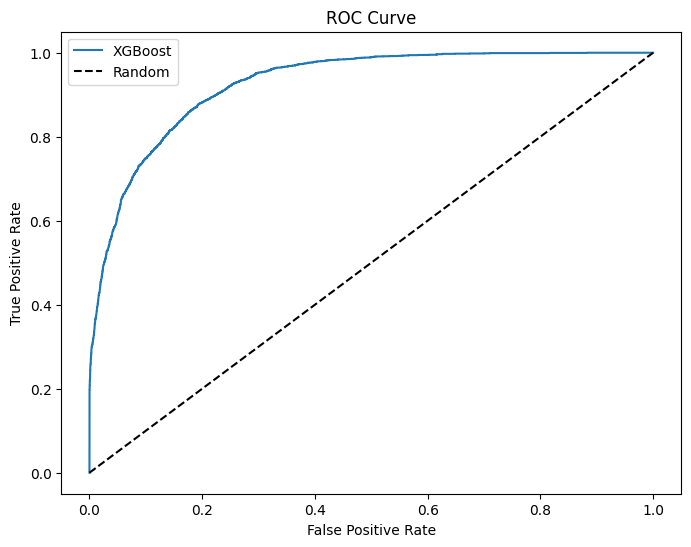

Cross-Validation Scores: [0.8572007  0.85450128 0.85666082 0.85166689 0.86015119]


In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("ROC AUC Score (XGBoost):", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]))
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

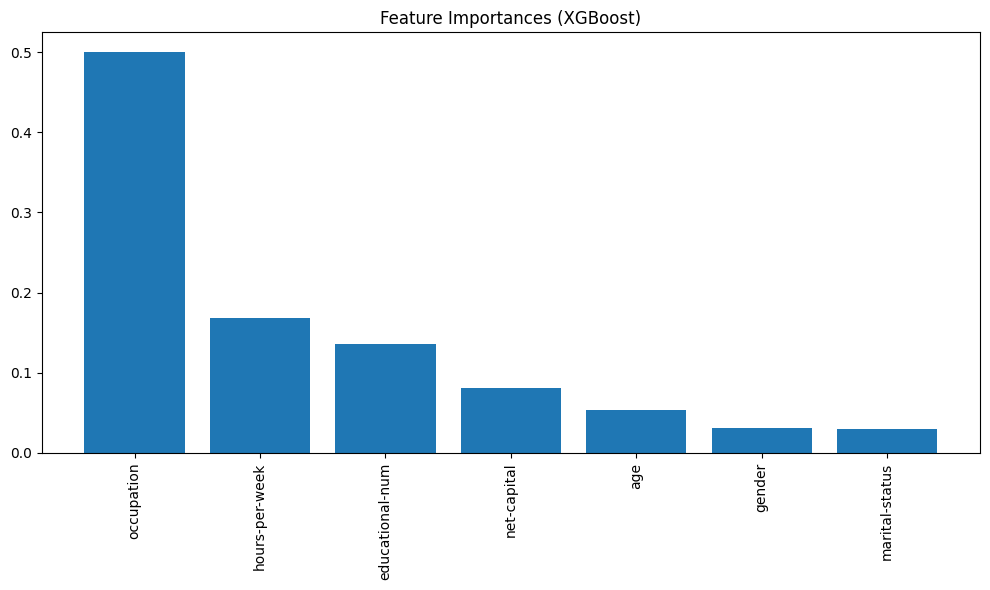


Sorted Feature Importances:
occupation: 0.4997
hours-per-week: 0.1684
educational-num: 0.1359
net-capital: 0.0808
age: 0.0535
gender: 0.0314
marital-status: 0.0303


In [49]:
# Use all columns except 'income' as feature names
feature_names = ['age', 'educational-num', 'occupation', 'marital-status', 'net-capital',
                 'gender', 'hours-per-week']

# Get feature importances from the model
importances = xgb_clf.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Optional: print sorted importances
print("\nSorted Feature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")



Using comparision models and chart to enhance why my model is better than other model.


 Model Comparison Table:
                 Model  Accuracy       MSE
3              XGBoost  0.866659  0.133341
2    Gradient Boosting  0.863312  0.136688
1        Random Forest  0.862557  0.137443
4     MLP (Neural Net)  0.855431  0.144569
5                  KNN  0.845822  0.154178
0  Logistic Regression  0.810840  0.189160

 ROC-AUC Comparison:
                 Model   ROC-AUC
3              XGBoost  0.925775
2    Gradient Boosting  0.921933
1        Random Forest  0.919553
4     MLP (Neural Net)  0.915060
5                  KNN  0.892881
0  Logistic Regression  0.832165


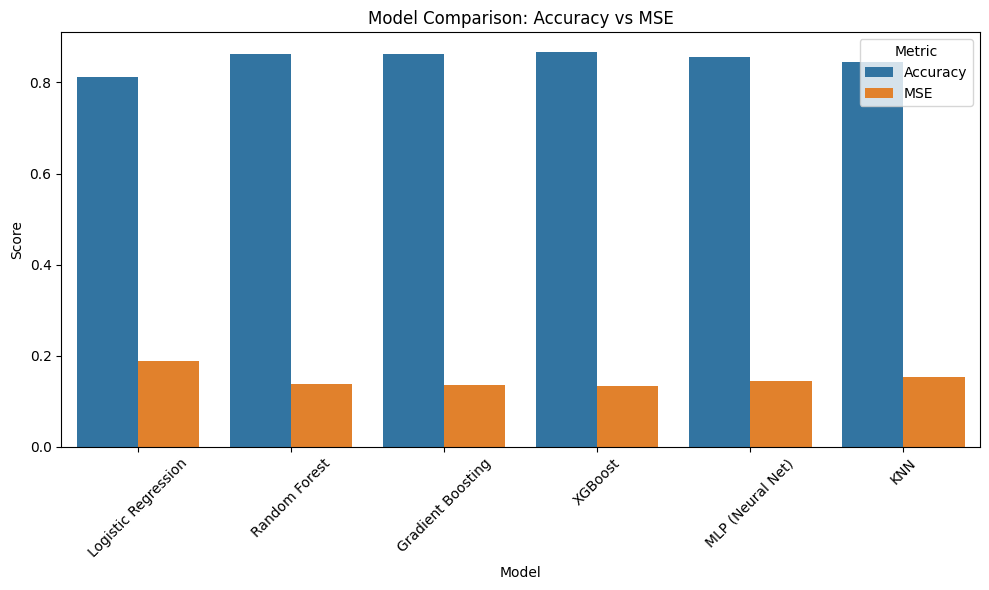

In [50]:
#Comparing the models and choosing the most optimal for application

# Create a summary table
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Gradient Boosting',
        'XGBoost',
        'MLP (Neural Net)',
        'KNN'
    ],
    'Accuracy': [
        accuracy_lr,        # Logistic Regression
        accuracy_rfc,    # Random Forest
        accuracy_gb,     # Gradient Boosting
        accuracy,        # XGBoost 
        accuracy_mlp,    # MLP
        accuracy_knn     # KNN
    ],
    'MSE': [
        mse_lr,             # Logistic Regression
        mse_rfc,         # Random Forest
        mse_gb,          # Gradient Boosting
        mse,             # XGBoost
        mse_mlp,         # MLP
        mse_knn          # KNN
    ]
})

print("\n Model Comparison Table:")
print(comparison_df.sort_values(by="Accuracy", ascending=False))

# Logistic Regression
proba_lr = lr.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, proba_lr)

# Random Forest
proba_rfc = rfc.predict_proba(X_test)[:, 1]
roc_auc_rfc = roc_auc_score(y_test, proba_rfc)

# Gradient Boosting
proba_gb = gb.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, proba_gb)

# XGBoost
proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, proba_xgb)

# MLP (Neural Net)
proba_mlp = mlp.predict_proba(X_test)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, proba_mlp)

# KNN
proba_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, proba_knn)

# Create ROC-AUC comparison table
roc_auc_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Gradient Boosting',
        'XGBoost',
        'MLP (Neural Net)',
        'KNN'
    ],
    'ROC-AUC': [
        roc_auc_lr,
        roc_auc_rfc,
        roc_auc_gb,
        roc_auc_xgb,
        roc_auc_mlp,
        roc_auc_knn
    ]
})

print("\n ROC-AUC Comparison:")
print(roc_auc_df.sort_values(by="ROC-AUC", ascending=False))

# Melt DataFrame for seaborn
melted = comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'MSE'], var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Model', y='Value', hue='Metric')
plt.xticks(rotation=45)
plt.title('Model Comparison: Accuracy vs MSE')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [51]:
import joblib
joblib.dump(xgb_clf, 'xgb_model.pkl')
joblib.dump(min_max_scaler, 'scaler.pkl')

from google.colab import files
files.download('xgb_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>